#**Linear Regression to XG Boost - All Regression Models**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [5]:
cd "/content/drive/My Drive/NYC Taxi"

/content/drive/My Drive/NYC Taxi


In [6]:
ls

'Abhijith_NYC_Taxi(3).ipynb'   tabular_data_jan.parquet          yellow_tripdata_2023-02.parquet
 Abhijith_NYC_Taxi.ipynb       tabular_data_jun.parquet          yellow_tripdata_2023-03.parquet
 NYC.ipynb                     tabular_data_mar.parquet          yellow_tripdata_2023-04.parquet
 tabular_data_apr.parquet      tabular_data_may.parquet          yellow_tripdata_2023-05.parquet
 tabular_data_feb.parquet      ts_data_final.parquet             yellow_tripdata_2023-06.parquet
 tabular_data_final.parquet    yellow_tripdata_2023-01.parquet


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from typing import Tuple

In [9]:
df = pd.read_parquet('tabular_data_final.parquet')
df.head()

,rides_previous_648_hour,rides_previous_647_hour,rides_previous_646_hour,rides_previous_645_hour,rides_previous_644_hour,rides_previous_643_hour,rides_previous_642_hour,rides_previous_641_hour,rides_previous_640_hour,rides_previous_639_hour,...,rides_previous_7_hour,rides_previous_6_hour,rides_previous_5_hour,rides_previous_4_hour,rides_previous_3_hour,rides_previous_2_hour,rides_previous_1_hour,pickup_hour,pickup_location_id,target_rides_next_hour
0,19.0,28.0,43.0,33.0,12.0,3.0,2.0,1.0,1.0,1.0,...,3.0,4.0,5.0,3.0,8.0,18.0,22.0,2023-01-28,4,58.0
1,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,...,5.0,5.0,7.0,5.0,8.0,15.0,26.0,2023-01-29,4,53.0
2,2.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,2.0,3.0,...,3.0,1.0,5.0,2.0,1.0,2.0,0.0,2023-01-30,4,2.0
3,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,2.0,...,2.0,1.0,1.0,1.0,0.0,0.0,2.0,2023-01-31,4,0.0
4,3.0,16.0,28.0,21.0,12.0,5.0,4.0,2.0,2.0,3.0,...,4.0,2.0,3.0,0.0,5.0,1.0,2.0,2023-01-28,7,1.0


In [10]:
df.shape

(4922, 651)

In [11]:
def train_test_split(
    df: pd.DataFrame,
    cutoff_date: datetime,
    target_column_name: str,
    ) -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    """
    """
    train_data = df[df.pickup_hour < cutoff_date].reset_index(drop=True)
    test_data = df[df.pickup_hour >= cutoff_date].reset_index(drop=True)

    X_train = train_data.drop(columns=[target_column_name])
    y_train = train_data[target_column_name]
    X_test = test_data.drop(columns=[target_column_name])
    y_test = test_data[target_column_name]

    return X_train, y_train, X_test, y_test

In [12]:
X_train, y_train, X_test, y_test = train_test_split(
    df,
    cutoff_date=datetime(2023, 4, 1, 0, 0, 0),
    target_column_name='target_rides_next_hour'
)

print(f'{X_train.shape=}')
print(f'{y_train.shape=}')
print(f'{X_test.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(2330, 650)
y_train.shape=(2330,)
X_test.shape=(2592, 650)
y_test.shape=(2592,)


In [13]:
# Creating a class (baselinemodelpreviousHour) - this function tells us the final values(last hour) of a locatiod ID on a particular date

class BaselineModelPreviousHour:
    """
    Prediction = actual demand observed in the last hour
    """
    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass

    def predict(self, X_test: pd.DataFrame) -> np.array:
        """"""
        return X_test[f'rides_previous_1_hour']

##**1.** **Baseline Model - Linear Regression**

In [14]:
model = BaselineModelPreviousHour()
prediction = model.predict(X_test)

In [15]:
prediction

0        7.0
1       16.0
2       19.0
3        4.0
4        3.0
        ... 
2587     0.0
2588     0.0
2589     0.0
2590     0.0
2591     0.0
Name: rides_previous_1_hour, Length: 2592, dtype: float32

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [17]:
test_score = mean_absolute_error(y_test, prediction)
print(test_score)

6.822145


In [18]:
# Using only past rides data since LR doesnt ingest date/time

past_rides_columns = [c for c in X_train.columns if c.startswith('rides_')]
X_train_only_numeric = X_train[past_rides_columns]

In [19]:
# Model training

model = LinearRegression()
model.fit(X_train_only_numeric, y_train)

LinearRegression()

In [20]:
# Removing the non numeric columns in x_test as well

X_test_only_numeric = X_test[past_rides_columns]
predictions = model.predict(X_test_only_numeric)
predictions

array([-1.8068826e-01,  3.9359085e+01,  3.1586409e+01, ...,
       -3.5371780e-02, -3.5371780e-02, -3.5371780e-02], dtype=float32)

In [21]:
# MAE (Mean Absolute Error)

test_score = mean_absolute_error(y_test, predictions)
print('test_score of linear regression model:', test_score)

test_score of linear regression model: 5.9234376


 **This linear regression model has a score of 5.92- the models I plan for further testing will be bechmarked against this.**

In [22]:
# MSE (Mean Squared Error)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,predictions)

print('Mean Squared Error:', mse)

Mean Squared Error: 311.02304


In [23]:
# r^2

from sklearn.metrics import r2_score

r2 = r2_score(y_true = y_test, y_pred=predictions)

print('R2 Score:', r2)

R2 Score: 0.7995510594155462


##**2. K-Nearest Neighbor ML Algorithm**

In [24]:
# Building K-Nearest Neighbors without hyperparameter tuning

from sklearn.neighbors import KNeighborsRegressor

# Creating model instance

knn_model = KNeighborsRegressor()

knn_model.fit(X_train_only_numeric, y_train)

y_pred = knn_model.predict(X_test_only_numeric)

mse = mean_squared_error(y_test,y_pred)

print('Mean Squared Error of KNN:', mse)

r2 = r2_score(y_true = y_test, y_pred=y_pred)

print('R2 Score:', r2)

Mean Squared Error of KNN: 227.0605
R2 Score: 0.8536634497137638


In [25]:
# Building K-Nearest Neighbors with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Creating model instance
knn_model = KNeighborsRegressor()

# Adding paramaters
param_grid_knn = {
    'n_neighbors':[3,5,7,9],
    'weights': ['uniform', 'distance'],
    'p': [1,2],
    'leaf_size':[10,20,30],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

# creating gridsearch

grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring='neg_mean_squared_error', cv=5)

# fitting model
grid_search_knn.fit(X_train_only_numeric, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30], 'n_neighbors': [3, 5, 7, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [26]:
# best params
best_params_knn = grid_search_knn.best_params_

print("Best params:",best_params_knn)

Best params: {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [27]:
# Training Model again

best_knn_model = KNeighborsRegressor(**best_params_knn)
best_knn_model.fit(X_train_only_numeric, y_train)

# Making predictions
y_pred_knn = best_knn_model.predict(X_test_only_numeric)

In [28]:
mse = mean_squared_error(y_test,y_pred_knn)

print('Mean Squared Error of KNN:', mse)

r2 = r2_score(y_true = y_test, y_pred=y_pred_knn)

print('R2 Score:', r2)

Mean Squared Error of KNN: 203.8248206518699
R2 Score: 0.868638455260313


##**3. Decision Tree ML Algorithm**

In [29]:
# Decision tree without hyperparameter tuning

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Creating decisontree
dt_model = DecisionTreeRegressor(random_state= 50)

# Training
dt_model.fit(X_train_only_numeric, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_only_numeric)

# Evaluating the model
mse_dt = mean_squared_error(y_test,y_pred_dt )
r2_dt = r2_score(y_test,y_pred_dt )

# Printing perfromances
print('Decsion Tree Performance Metrics without hyperaparameter tuning:')
print('Mean Squared Error (MSE):', mse_dt)
print('R-Squared(R2):', r2_dt)

Decsion Tree Performance Metrics without hyperaparameter tuning:
Mean Squared Error (MSE): 416.23649691358025
R-Squared(R2): 0.7317428317280739


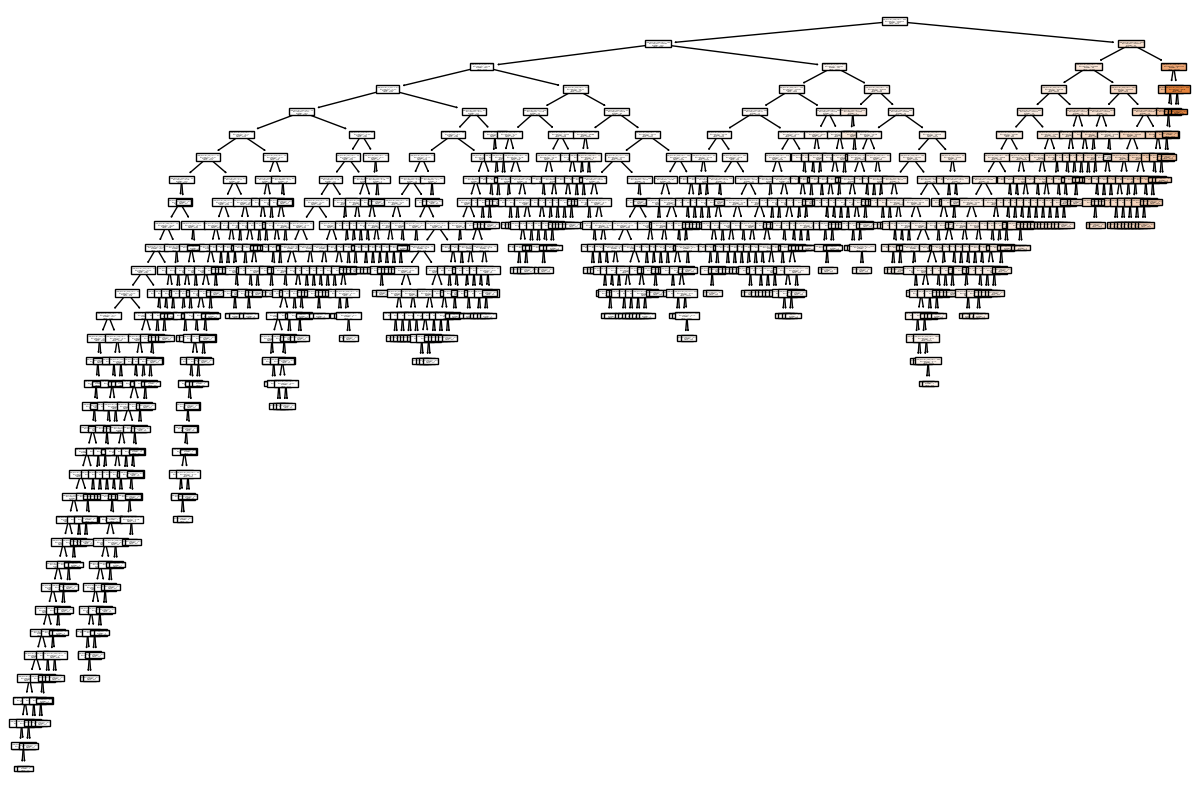

In [30]:
# Visualizaing the tree
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
tree.plot_tree(dt_model, feature_names=X_train.columns, filled=True)
plt.show()

In [31]:
# Decisiontree with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Defining hyperparameter grid
param_grid = {
            'max_depth': [None, 10,20,30,40,50],
            'min_samples_split': [2,5,8,10,12,14],
            'min_samples_leaf': [1,2,4,5,6],
}

# Creating decision tree model
dt_model = DecisionTreeRegressor(random_state= 50)

# Creating gridsearchcv
grid_search = GridSearchCV(dt_model, param_grid, cv=3, scoring= 'neg_mean_squared_error', verbose=2)

# fitting the model
grid_search.fit(X_train_only_numeric, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Using the best model for predictions
best_dt_model = grid_search.best_estimator_
y_pred_dt_tuned = best_dt_model.predict(X_test_only_numeric)

# Evaluating the tuned model
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned)

# Printing perfromances
print('Decsion Tree Performance Metrics with hyperaparameter tuning:')
print('Best Hyperparameters:', best_params)
print('Mean Squared Error (MSE):', mse_dt_tuned)
print('R-Squared(R2):', r2_dt_tuned)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.3s


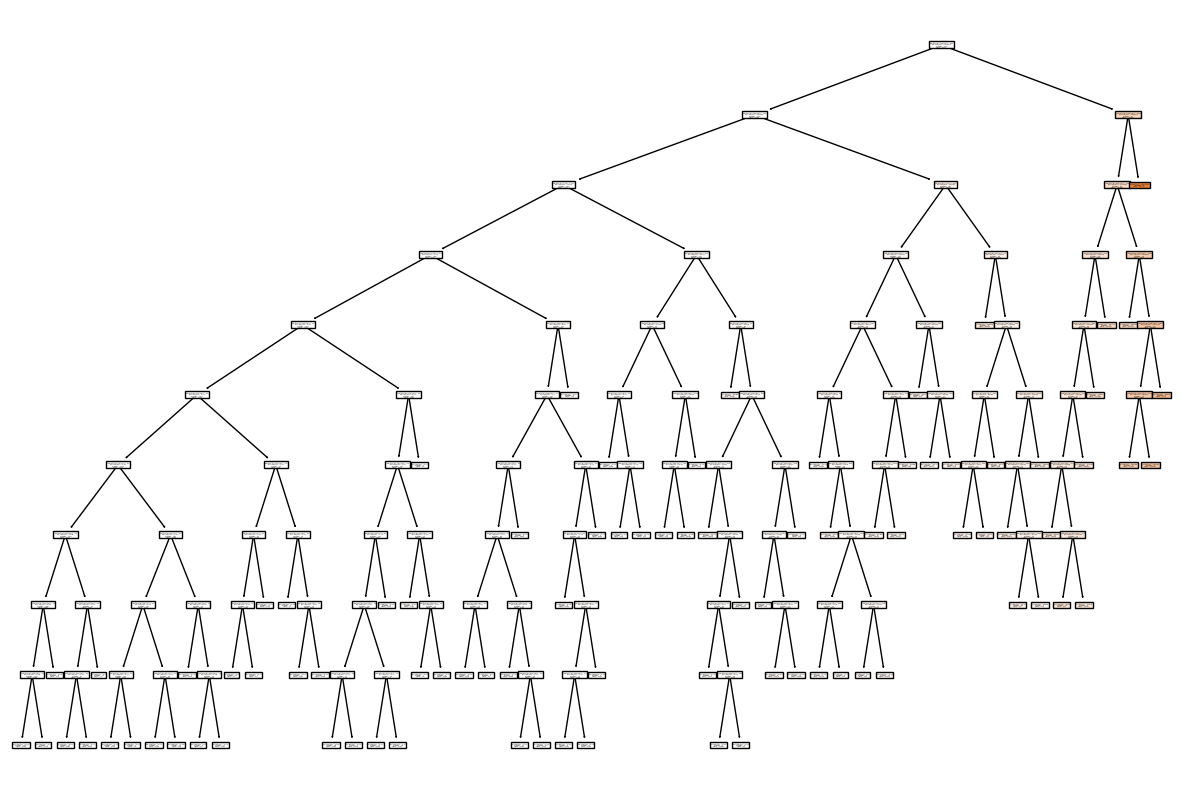

In [32]:
# Visualizing the tree

plt.figure(figsize = (15, 10))
tree.plot_tree(best_dt_model, feature_names=X_train.columns, filled=True)
plt.show()

##**4. Random Forest ML Algorithm (Bootstrapping+Aggregation = Bagging)**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Creating random forest regressor
rf_model = RandomForestRegressor(random_state=50)

#Training
rf_model.fit(X_train_only_numeric, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_only_numeric)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Printing performances
print('Random Forest Performance Metrics without hyperparamater tuning:')
print('Mean Squared Error (MSE):', mse_rf)
print('R-Squared (R2):', r2_rf)

Random Forest Performance Metrics without hyperparamater tuning:
Mean Squared Error (MSE): 192.92378132716053
R-Squared (R2): 0.8756639851265098


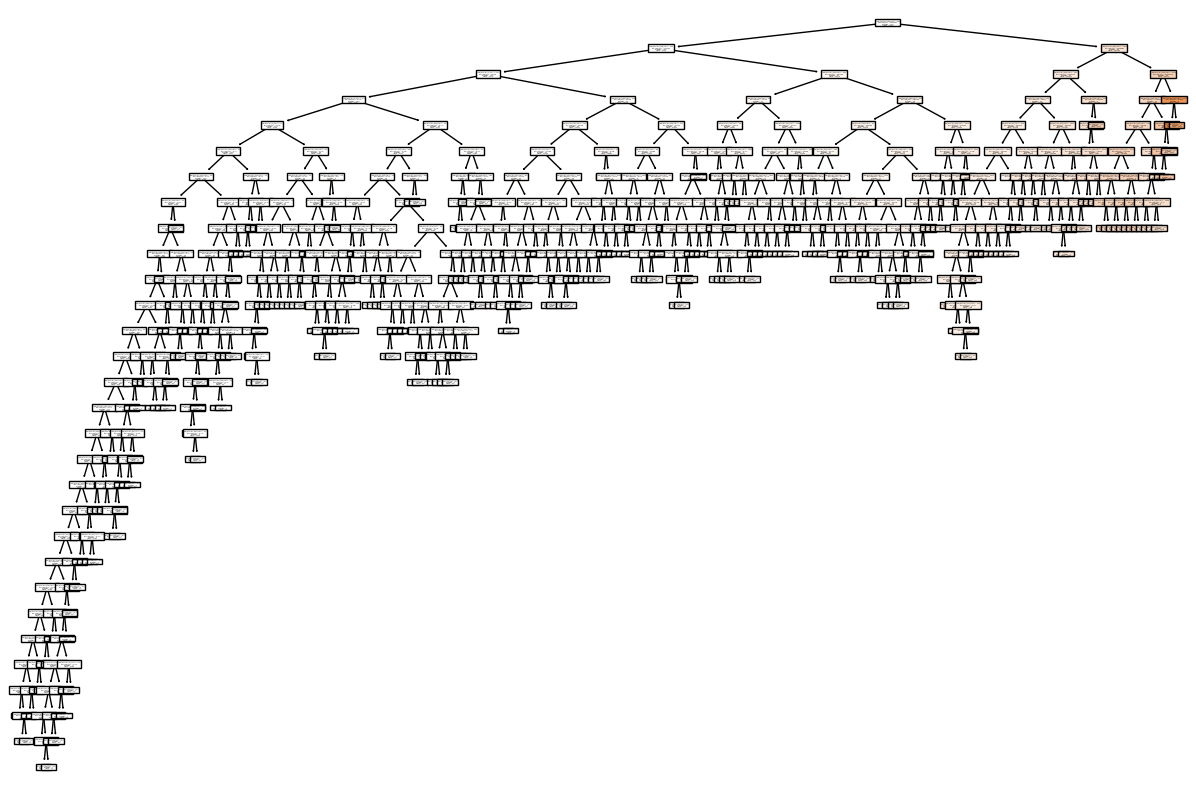

In [34]:
from sklearn import tree

tree_to_vis = rf_model.estimators_[0]

# Visualization the tree
plt.figure(figsize = (15,10))
tree.plot_tree(tree_to_vis, feature_names = X_train.columns, filled =True)
plt.show()

In [35]:
# Hyperparameter tuning of Random forest

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Defining the paramater grid
param_dist = {
    'n_estimators': randint(10,200),
    'max_features': ['auto','sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30,40,50, 60, 70, 80, 90, 100],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,11),
    'bootstrap': [True, False]
}

# Create a Random Forest Regressor instance
rf_model = RandomForestRegressor(random_state=50)

# Create RandomizedSearchCV object
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=50)

# Fit the model
rf_random.fit(X_train_only_numeric, y_train)

# Best parameters found by RandomizedSearchCV
best_params = rf_random.best_params_

# Use the best parameters to create the final model
best_rf_model = RandomForestRegressor(random_state=50, **best_params)

# Train the final model
best_rf_model.fit(X_train_only_numeric, y_train)

# Predictions
y_pred_rf = best_rf_model.predict(X_test_only_numeric)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Printing performances and best parameters
print('Random Forest Performance Metrics with Hyperparameter Tuning:')
print('Best Hyperparameters:', best_params)
print('Mean Squared Error (MSE):', mse_rf)
print('R-Squared (R2):', r2_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   1.0s
[CV] END bootstrap=False, max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=105; total time=   0.8s
[CV] END bootstrap=False, max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=105;

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=158; total time=  29.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=158; total time=  38.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=158; total time=  34.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=158; total time=  34.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=158; total time=  40.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=36; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, ma

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=196; total time=  33.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=196; total time=  45.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=196; total time=  41.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=196; total time=  37.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=196; total time=  54.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=139; total time=   2.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=139; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=139; total time=   2.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=139; total time=   2.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=139; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest Performance Metrics with Hyperparameter Tuning:
Best Hyperparameters: {'bootstrap': True, 'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 196}
Mean Squared Error (MSE): 202.36809585310456
R-Squared (R2): 0.8695772890059503


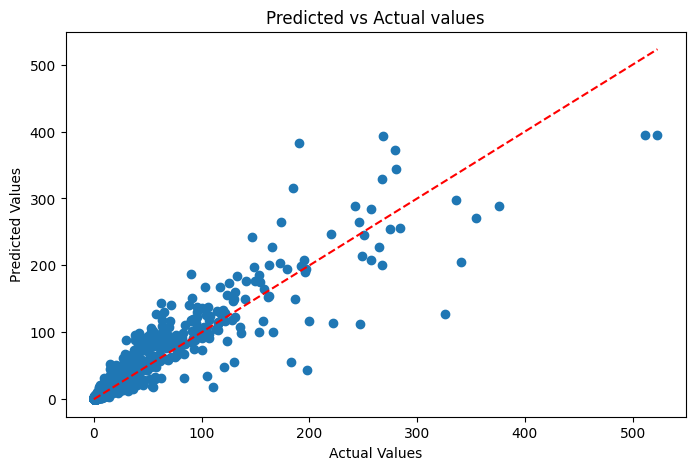

In [36]:
# Prediction vs Actual plot

plt.figure(figsize = (8,5))
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual values')
plt.show()

##**5. XGBOOST - Boosting Technique**
- Extreme Gradient Boosting technique

In [37]:
from xgboost import XGBRegressor

# Creating model
xgb_model = XGBRegressor(random_state=50)

# Training
xgb_model.fit(X_train_only_numeric, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_only_numeric)

# Evaluating the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Printing performance
print('XGBoost performance without hyperparameter tuning:')
print('Mean Squared Error (MSE):', mse_xgb)
print('R_Squared(R2):', r2_xgb)

XGBoost performance without hyperparameter tuning:
Mean Squared Error (MSE): 214.7818
R_Squared(R2): 0.8615768785079552


<Figure size 800x600 with 0 Axes>

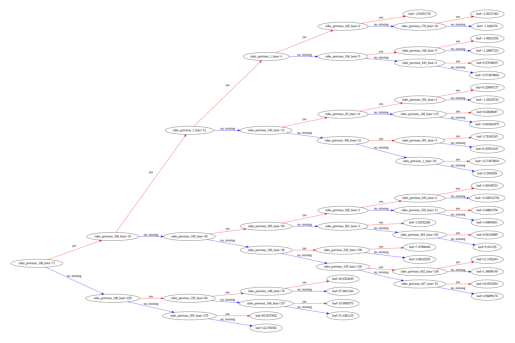

In [38]:
# Visualizing Tree
from xgboost import plot_tree, plot_importance

plt.figure(figsize=(8,6))
plot_tree(xgb_model, num_trees=0, rankdir = 'LR')
plt.show()

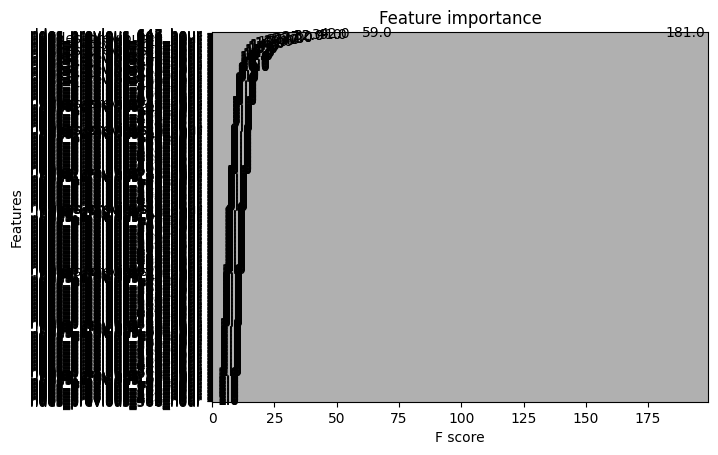

In [39]:
# Feature Importance

plot_importance(xgb_model)
plt.show()

In [40]:
# XGboost with hyperaparameter tuning

xgb_model = XGBRegressor(random_state=50)

# Paramater grid

param_dist = {
    'learning_rate':[0.01,0.1,0.2,0.3],
    'max_depth': [3,4,5,6,7,8,9,10],
    'min_child_weight': [0.1,0.5,1,2,3,5,8,10],
    'subsample':[0.5,0.7,0.8,0.9],
    'n_estimators':[200,300,500],
    'colsample_bytree': [0.5,0.7,0.8,0.9],
    'reg_alpha': [0,0.1,0.5,1,5,10],
    'reg_lambda':[0,0.1,0.5,1,5,10]
}

xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=50)

# Fit the model
xgb_random.fit(X_train_only_numeric, y_train)

# Best parameters found by RandomizedSearchCV
best_params = xgb_random.best_params_

# Use the best parameters to create the final model
best_xgb_model = XGBRegressor(random_state=50, **best_params)

# Train the final model
best_xgb_model.fit(X_train_only_numeric, y_train)

# Predictions
y_pred_rf = best_xgb_model.predict(X_test_only_numeric)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Printing performances and best parameters
print('XGBoost Performance Metrics with Hyperparameter Tuning:')
print('Best Hyperparameters:', best_params)
print('Mean Squared Error (MSE):', mse_rf)
print('R-Squared (R2):', r2_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=8, min_child_weight=8, n_estimators=300, reg_alpha=10, reg_lambda=0.5, subsample=0.5; total time=  16.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=8, min_child_weight=8, n_estimators=300, reg_alpha=10, reg_lambda=0.5, subsample=0.5; total time=  27.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=8, min_child_weight=8, n_estimators=300, reg_alpha=10, reg_lambda=0.5, subsample=0.5; total time=  17.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=8, min_child_weight=8, n_estimators=300, reg_alpha=10, reg_lambda=0.5, subsample=0.5; total time=  14.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=8, min_child_weight=8, n_estimators=300, reg_alpha=10, reg_lambda=0.5, subsample=0.5; total time=  24.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=0.1, n_estimators=300, reg_alpha=1